<a href="https://colab.research.google.com/github/joseemaro/bdm_datasets/blob/main/tpfinal_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SE IMPORTAN LAS LIBRERIAS Y LOS DATASETS.

In [ ]:
!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore.csv

!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv

import numpy as np # algebra linear
import pandas as pd # procesamiento de datos, CSV file 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')
from sklearn import metrics

## SE LEE EL DATASET CON LOS DATOS DE LAS APLICACIONES

In [2]:
# Lee el archivo
data = pd.read_csv("googleplaystore.csv", encoding = "utf-8") 

# PREPROCESAMIENTO DE LOS DATOS

In [ ]:
#se verifica si hay nan de los registros
data.isna().sum()

Se observa que el campo rating tiene una gran cantidad de faltantes, mientras que los campos type,content rating, current ver, y android ver tienen pocos faltantes.

In [ ]:
#se remplaza los nan de rating por la media debido a que son muchos registros
data['Rating'].fillna((data['Rating'].mean()), inplace=True)

data.isna().sum()

In [ ]:
#el resto de los registros con nan al ser una cantidad minima se borran
df1 = data.dropna()

df1.isna().sum()

In [ ]:
#SE VERIFICA SI HAY REGISTROS DUPLICADOS
df1[df1.duplicated(['App'])]

In [7]:
#se eliminan los duplicados basandose en el nombre de la app
df2 = df1.drop_duplicates(keep='last',subset=['App'])

In [8]:
#campo installs
#se limpian los caracteres para pasar el campo a entero
df2.Installs = df2.Installs.str.replace('+' , '')
df2.Installs = df2.Installs.str.replace(',' , '')

In [ ]:
#se convierte el campo  installs a int
df2.Installs = df2.Installs.astype('float').astype('int')
df2['Installs'].unique()

In [ ]:
#se convierte el campo price a float
df2['Price'] = df2['Price'].apply(lambda x: float(x.replace("$","")))
df2['Price'].unique()

In [ ]:
#se convierte el conteo de reviews a int
df2['Reviews']= df2['Reviews'].apply(lambda x: int(x))
df2['Reviews'].unique()

In [ ]:
#vamos a remplazar el varies with device del campo size por nan
df2['Size'].replace('Varies with device',np.nan,inplace=True)
#se convierte size a float
df2['Size']=df2['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
df2['Size'].unique()

# VISUALIZACION DE DATOS


In [ ]:
#Numero de aplicaciones por categoria

fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Numero de apps/Categoria', fontsize=10)
plt.ylabel('Cantidad') 

In [15]:
#apps con 1 billon de descargas

dfa = df2.groupby(['Category' ,'App'])['Installs'].sum().reset_index()

dfa = dfa.sort_values('Installs', ascending = False)

dftop = dfa[dfa.Installs == 1000000000 ]


dftop.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,Category,App,Installs
337,BOOKS_AND_REFERENCE,Google Play Books,1000000000
6377,NEWS_AND_MAGAZINES,Google News,1000000000
8827,TOOLS,Google,1000000000
4765,GAME,Subway Surfers,1000000000
1059,COMMUNICATION,Hangouts,1000000000
7414,PRODUCTIVITY,Google Drive,1000000000
1053,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
9331,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1176,COMMUNICATION,WhatsApp Messenger,1000000000
2645,FAMILY,Google Play Games,1000000000


La lista de apps que tienen mas de 1 billon de descargas muestra a las siguientes aplicaciones:
Google ,Google Drive, Google Chrome Fast Secure , Google+ ,Google Photos ,Google Play Games ,Google Play Books ,Google News ,Hangouts

Google ,Google Drive, Google Chrome Fast Secure , Google+ ,Google Photos ,Google Play Games ,Google Play Books ,Google News ,Hangouts

Gmail ,Google Street View ,Google Play Movies & TV ,Maps - Navigate & Explore , YouTube (Apps pertenecientes a Google)

Facebook ,WhatsApp Messenger , Instagram ,Messenger – Text and Video Chat for Free (Apps pertenecientes a Facebook)

Skype - free IM & video calls (pertenece a Microsoft)

Subway Surfers (pertenece a SYBO GAMES)

La razon por la que las aplicaciones de google tienen mas descargas que el resto es porque vienen preinstaladas en todos los sistemas android.


In [ ]:
#Precio promedio de las apps en cada categoria
fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').mean().sort_values(by='Price',ascending='True')['Price'].plot(kind='bar',title='Precio Promedio por categoria', fontsize=10)
plt.ylabel('Precio promedio - USD', fontsize=15) 
plt.xlabel('Categoria',  fontsize=15)

In [30]:
#Tamaño promedio de las aplicaciones
print("Mean size " + str(df2["Size"].mean()/(1024*1024)) + " Mb") #converting in MB
print("Heaviest app size " + str(df2["Size"].max()/(1024*1024)) + " Mb") #converting in MB
print("Smalles app size " + str(df2["Size"].min()/(1024*1024)) + " Mb") #converting in MB

Mean size 19.47081493838783 Mb
Heaviest app size 95.367431640625 Mb
Smalles app size 0.008106231689453125 Mb


In [ ]:
#Numero de descargas por categoria
fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').sum().sort_values(by='Installs',ascending='False')['Installs'].plot(kind='bar',title='Descargas por categoria', fontsize=10)
plt.ylabel('Numero de descargas', fontsize=15) 

In [ ]:
#Porcentaje de apps pagas y gratis

df3= df2.copy()
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0
df3["is_free"] = df3["Price"].apply(lambda x: int(is_free(x))) 
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = df3['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True,textprops={'fontsize': 16})
plt.title('Apps Gratis vs Pagas',size = 20)
plt.legend()
plt.show()

In [ ]:
#vamos a observar la distribucion de la variable rating con un histograma
fig = plt.figure(figsize=(16,8)) 
plt.hist(df2['Rating'],edgecolor = 'black', log=True)
plt.title("Distribucion del campo Rating", fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.tight_layout()
plt.legend()

In [ ]:
#tambien vamos a observar la distribucion de los precios
fig = plt.figure(figsize=(16,8)) 
plt.hist(df2['Price'],edgecolor = 'black', log=True)
plt.title("Distribucion del campo Price",  fontsize=15)
plt.xlabel('Price',  fontsize=15)
plt.tight_layout()
plt.legend()

In [ ]:
#mayor cantidad de reviews
most_no_of_reviews = df2.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

sns.barplot(most_no_of_reviews.index, most_no_of_reviews.Reviews)

plt.title('Top 10 Apps con mas reviews', fontsize=12)
plt.xticks(rotation=90, fontsize=12);
plt.ylabel('Reviews', fontsize=12);
plt.xlabel('Categoria', fontsize=12);

# Feature engineering - vamos a crear una columna que asocia descargas y precio



In [ ]:

df_paid_apps = df2[df2['Price']>0]
df_paid_apps["Ganancia"] = df_paid_apps["Installs"] * df_paid_apps["Price"]
#histograma de las aplicaciones una vez eliminadas las gratis
fig = plt.figure(figsize=(16,8)) 
plt.hist(df_paid_apps['Price'],edgecolor = 'black', log=True)
median_age = df_paid_apps['Price'].median()
plt.title("Precio de los apps")
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()

In [35]:
#apps paga con mas ganancia
df_paid_apps.sort_values(by=['Ganancia'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ganancia
6692,cronometra-br,PRODUCTIVITY,4.193338,0,5400000.0,0,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,0.0
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.193338,0,33000000.0,0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up,0.0
5486,AP Series Solution Pro,FAMILY,4.193338,0,7400000.0,0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up,0.0
9719,EP Cook Book,MEDICAL,4.193338,0,3200000.0,0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,0.0
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.193338,0,56000000.0,0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,Grand Theft Auto: San Andreas,GAME,4.400000,348962,26000000.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6990000.0
4034,Hitman Sniper,GAME,4.600000,408292,29000000.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
5356,I Am Rich Premium,FINANCE,4.100000,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
5351,I am rich,LIFESTYLE,3.800000,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0


la app paga con mayor ganancia es minecraft con 69900000.0 usd.

Text(0, 0.5, 'Ganancia de descargas')

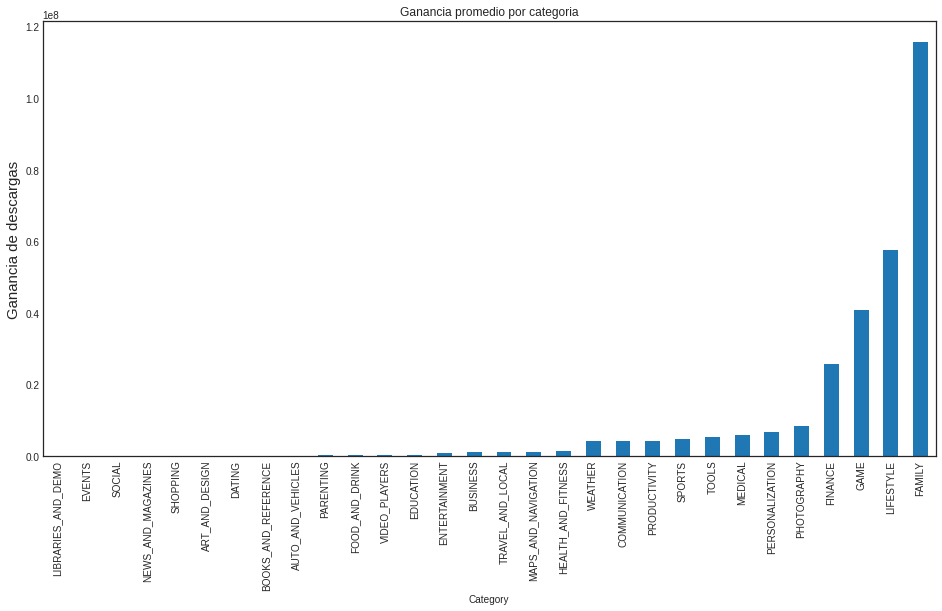

In [37]:
#ganancia por categoria
fig = plt.figure(figsize=(16,8)) 
df_paid_apps.groupby('Category').sum().sort_values(by='Ganancia',ascending='False')['Ganancia'].plot(kind='bar',title='Ganancia promedio por categoria', fontsize=10)
plt.ylabel('Ganancia de descargas', fontsize=15)

In [ ]:
#Grafico de correlacion entre los features del dataset
df3 = df2
df3["Type"] = df3["Type"].map({"Free": 0, "Paid":1})
sns.heatmap(df3.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Se observa que el numero de descargas tiene una alta correlacion de 0,64 con el numero de reviews lo cual era predecible. 
El tipo(gratis o paga) esta  relacionado positivamente con el precio de forma que cuando el tipo se convierte en 1(pago) el precio aumenta.


# Machine learning modeling


## #Predecir el rating de una aplicacion usando regresion linear

In [14]:
#funciones 
def print_metrics(y, y_predict):
    print('MSE: '+ str(metrics.mean_squared_error(y,y_predict)))
    print('MAE: '+ str(metrics.mean_absolute_error(y,y_predict)))
    print ('MSLE: '+ str(metrics.mean_squared_log_error(y,y_predict)))

def reg_plotting(y, y_predict, title):
    plt.figure(figsize=(12,8))
    sns.regplot(y_predict ,y,color='red')
    plt.legend()
    plt.title(title)
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Ratings')
    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df2[["Reviews","Price"]]
y=df2.Rating

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

# se pasan los features a la misma escala
scaler=StandardScaler()
X= scaler.fit_transform(X)

from sklearn.linear_model import LinearRegression
lin_r= LinearRegression()
model= lin_r.fit(X_train,y_train)

rating= model.predict(np.array([[1000,3]]))
print("Predicted rating is:",rating)

Predicted rating is: [4.16738455]


In [17]:
y=model.intercept_ +(1000*model.coef_[0]+2*model.coef_[1])
print("Rating is:",y)

Rating is: 4.168012452372769


In [18]:
pred= model.predict(X_test)
pred

array([4.16925362, 4.16929188, 4.16925104, ..., 4.17373128, 4.16925394,
       4.16925037])

In [19]:
#test
from sklearn.metrics import mean_squared_error
print_metrics(y_test, pred)

MSE: 0.23787500493119831
MAE: 0.3293894837717997
MSLE: 0.011338780869685464


No handles with labels found to put in legend.


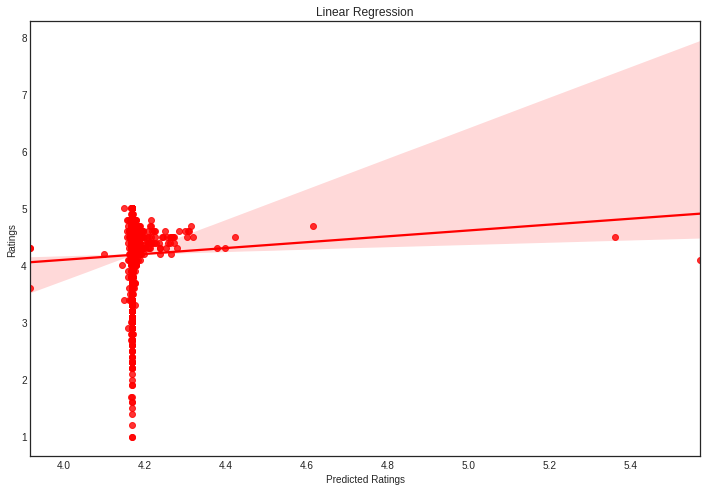

In [20]:
#test
reg_plotting(y_test, pred, 'Linear Regression')

### Modelado con SVR

In [21]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)

In [22]:
svr_predict

array([4.20021102, 4.20184999, 4.20010021, ..., 4.3493323 , 4.20022487,
       4.20007173])

In [23]:
#test
print_metrics(y_test, svr_predict)

MSE: 0.23291639139573903
MAE: 0.31175351722084654
MSLE: 0.01124414135190453


No handles with labels found to put in legend.


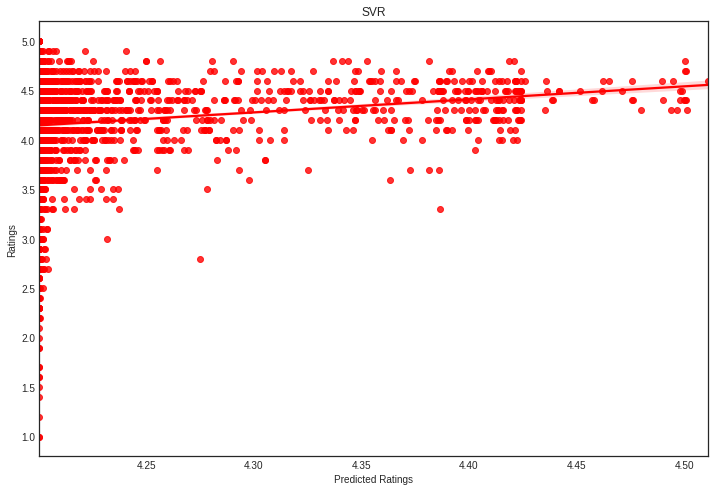

In [24]:
#test
reg_plotting(y_test, svr_predict, 'SVR')

### Modelado con Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_jobs=-1)
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)

In [26]:
#test
print_metrics(y_test, rand_forest_predict)

MSE: 0.2738801977080416
MAE: 0.3609321565013424
MSLE: 0.012726982884617518


No handles with labels found to put in legend.


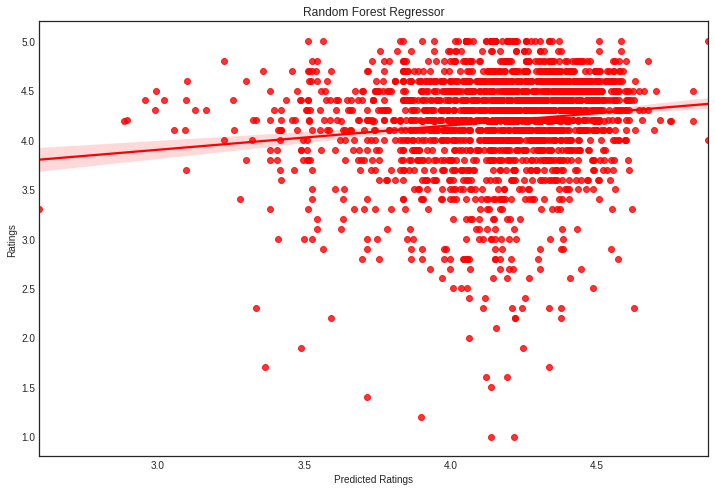

In [27]:
#test
reg_plotting(y_test, rand_forest_predict, 'Random Forest Regressor')

voting regressor

In [29]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('lin', lin_r), ('svr', svr), ('rf', rand_forest)])
voting_reg.fit(X_train, y_train)
voting_reg_predict = voting_reg.predict(X_test)

In [30]:
print_metrics(y_test, voting_reg_predict)

MSE: 0.23197487867257283
MAE: 0.32092381185418134
MSLE: 0.011109032233441143


No handles with labels found to put in legend.


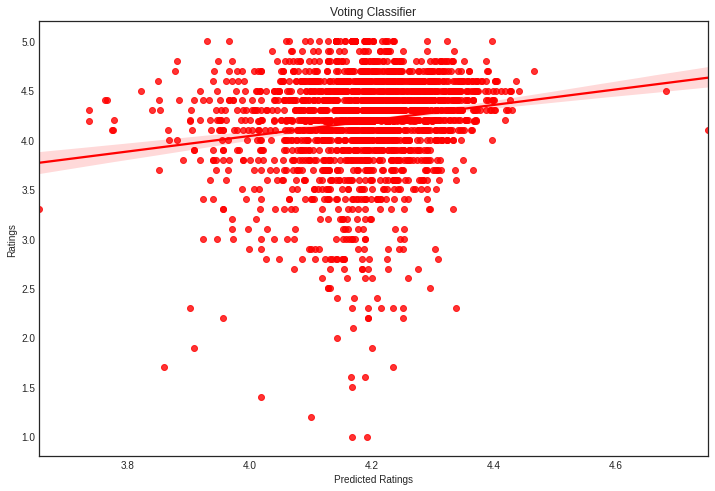

In [31]:
reg_plotting(y_test, voting_reg_predict, 'Voting Classifier')